<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/2024_01/Turma01/LabFis4IntensidadeLuminosa_2024_1_Grupo2_turma01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV

Prática 01: Intensidade Luminosa

obj.: Verificar a relação: I = C/r^2

log (I(r)/I_max) = log(C) - 2.log(r)

y=m.x+b

y=log (I(r)/I_max); x=log (I(r)/I_max); m_t=-2 e b_t=log(C)

Dados do Exemplo: I_max=10 w/m²; I(r)=10,9,8,7,6,5,4,3,2,1; r=?




In [ ]:
I_m=10

In [ ]:
#Distãncia da fonte a fibra óptica
#r = [14.0,14.85,16.05,17.55,19.4,21.55,24.8,30.35,37.25,56.9] # cm - grupo 01,
#r=[1.9,2.0,2.45,2.51,3.0,3.85,4.5,5.6,7.6,12.9] # cm - grupo 02,
r = [5,7,9,11,13,15,17,19,21,23] #cm grupo 3,



In [ ]:
#Intensidades Relativas:

IR =[ 1.0,0.71,0.5,0.36,0.26,0.22,0.18,0.15,0.12,0.1]

In [ ]:
print(r)
N_medidas = len(r)
print ( "Número de medidas: {}".format( N_medidas ) )



[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
Número de medidas: 10


In [ ]:
x = np.log10(r)
print ("x=log(r) = ", x)

x=log(r) =  [0.69897    0.84509804 0.95424251 1.04139269 1.11394335 1.17609126
 1.23044892 1.2787536  1.32221929 1.36172784]


In [ ]:
y=np.log10(IR)
print ("y=log(IR) = ", y)

y=log(IR) =  [ 0.         -0.14874165 -0.30103    -0.4436975  -0.58502665 -0.65757732
 -0.74472749 -0.82390874 -0.92081875 -1.        ]


In [ ]:
media_X = x.mean()
media_X2 = ( x** 2 ).mean()
var_X_populacional = ( x ** 2 ).mean() - ( media_X ** 2 )
dp_X_populacional = np.sqrt( var_X_populacional )
print ( "Média (cm): {}".format( media_X ) )
print ( "Média quadrados(cm²): {}".format( media_X2 ) )
print ( "Variância (cm²): {}".format( var_X_populacional ) )
print ( "Desvio padrão (cm): {}".format( dp_X_populacional ) )



Média (cm): 1.1022887503392957
Média quadrados(cm²): 1.2573669580317925
Variância (cm²): 0.042326468907226245
Desvio padrão (cm): 0.2057339760643007


In [ ]:
media_Y = y.mean()
media_Y2 = ( y** 2 ).mean()
var_Y_populacional = ( y ** 2 ).mean() - ( media_Y ** 2 )
dp_Y_populacional = np.sqrt( var_Y_populacional )
print ( "Média : {}".format( media_Y ) )
print ( "Média quadrados: {}".format( media_Y2 ) )
print ( "Variância : {}".format( var_Y_populacional ) )
print ( "Desvio padrão : {}".format( dp_Y_populacional ) )

Média : -0.5625528107177982
Média quadrados: 0.4165626554912086
Variância : 0.10009699064471372
Desvio padrão : 0.3163810845242075


In [ ]:
x_X_y = ( x * y ).mean()
cov_populacional = x_X_y - ( media_X * media_Y )
coeficiente_correlacao = cov_populacional / ( dp_X_populacional * dp_Y_populacional )
print ( "Covariância (logr × logIr): {}".format( cov_populacional ) )
print ( "Coeficiente de correlação: {}".format( coeficiente_correlacao ) )


Covariância (logr × logIr): -0.06482989380992554
Coeficiente de correlação: -0.9959987201342871


Coeficientes:


In [ ]:
coeficiente_m = cov_populacional / var_X_populacional
print ( "Coeficiente m (cm): {}".format( coeficiente_m ) )


Coeficiente m (cm): -1.5316631763453665


In [ ]:

coeficiente_b = media_Y - coeficiente_m * media_X # cm
print ( "Coeficiente b (cm): {}".format( coeficiente_b ) )

Coeficiente b (cm): 1.1257822778766522


Incertezas:

In [ ]:
arr_desvios_ajuste = ( y - ( coeficiente_m * x + coeficiente_b ) )
arr_desvios_ajuste

array([-0.05519566,  0.01988162,  0.03476584,  0.02558305, -0.00462292,
        0.01801608,  0.01412353,  0.00892878, -0.02140643, -0.0400739 ])

In [ ]:
print ( arr_desvios_ajuste ** 2 )
print ( "Soma quadrado desvios (cm): {}".format( ( arr_desvios_ajuste ** 2 ).sum() ) )



[3.04656098e-03 3.95278779e-04 1.20866359e-03 6.54492491e-04
 2.13713583e-05 3.24579011e-04 1.99474113e-04 7.97231726e-05
 4.58235118e-04 1.60591708e-03]
Soma quadrado desvios (cm): 0.007994295696702711


In [ ]:
ep_y_1 = np.sqrt( ( arr_desvios_ajuste ** 2 ).sum() / ( N_medidas - 2 ) )
print ( "epsilon_y = {}".format( ep_y_1 ) )



epsilon_y = 0.03161150047194595


In [ ]:
ep_y_2 = dp_Y_populacional * np.sqrt( ( N_medidas / ( N_medidas - 2 ) ) * ( 1. - coeficiente_correlacao ** 2 ) )
print ( "epsilon_y = {}".format( ep_y_2 ) )

epsilon_y = 0.031611500471947586


In [ ]:
ep_y = ep_y_2
sigma_m = ep_y / ( dp_X_populacional * np.sqrt( N_medidas ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( sigma_m ) )


Incerteza padrão coeficiente m (cm): 0.04858912643364209


In [ ]:
sigma_b = sigma_m * np.sqrt( media_X2 )
print ( "Incerteza padrão coeficiente b (cm): {}".format( sigma_b ) )

Incerteza padrão coeficiente b (cm): 0.05448414158567583


Estimativas para os coeficientes:

In [ ]:
print ( "m = {:.2f} ± {:.2f} (cm)".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ) )

m = -1.53 ± 0.05 (cm)


In [ ]:
print ( "b = {} ± {} (cm)".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ) )

b = 1.13 ± 0.05 (cm)


Text(0.4, 0.85, '$b = 1.13 \\pm 0.05\\,\\left(\\rm{cm}\\right)$')

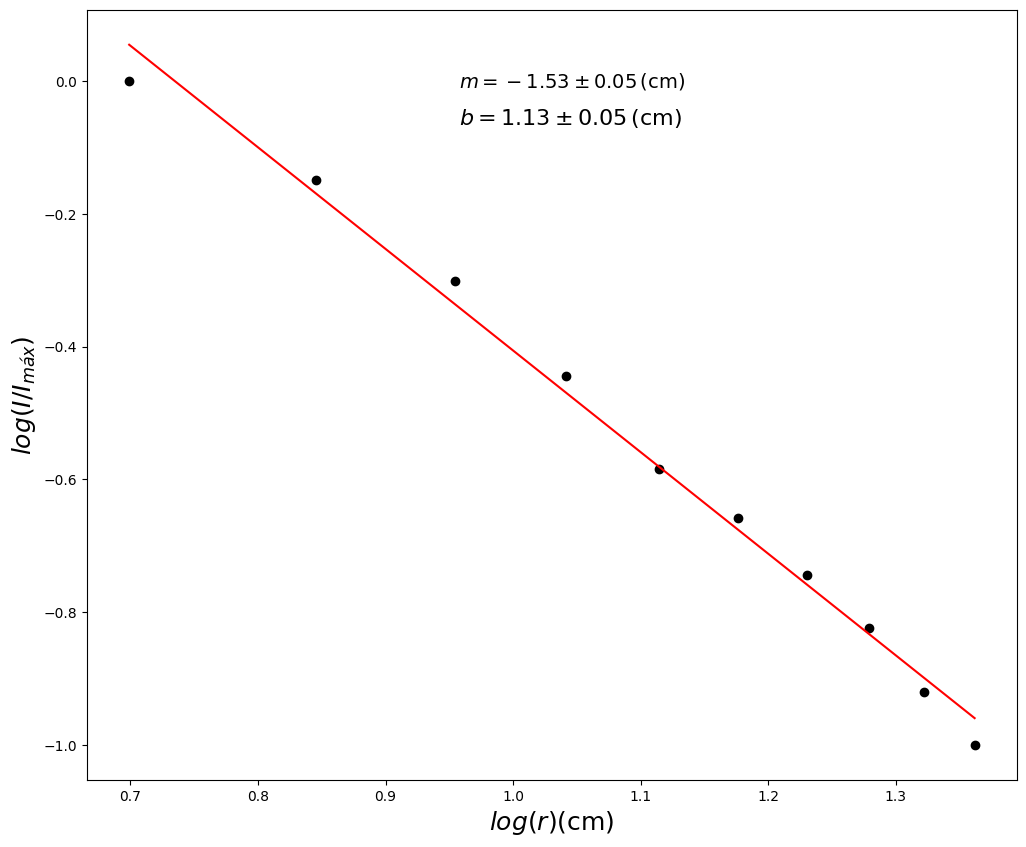

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( coeficiente_m * x + coeficiente_b ), '-r' )
plt.xlabel( r"$log(r) (\rm{cm})$", fontsize=18)
plt.ylabel( r"$log(I/I_{máx})$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ),
          fontsize=14, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

Usando um pacote:

In [ ]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[ 1.12578227 -1.53166317] [[ 0.00296852 -0.0026024 ]
 [-0.0026024   0.0023609 ]]


In [ ]:
print ( "Coeficiente m (cm): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (cm)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m (cm): -1.5316631730874426
Incerteza padrão coeficiente m (cm): 0.04858912579977276
a = -1.53 ± 0.05 (cm)


In [ ]:
print ( "Coeficiente b (cm): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (cm): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (cm)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (cm): 1.1257822748173127
Incerteza padrão coeficiente b (cm): 0.05448414091438419
1.13 ± 0.05 (cm)


Text(0.4, 0.85, '$b = 1.13 \\pm 0.05\\,\\left(\\rm{cm}\\right)$')

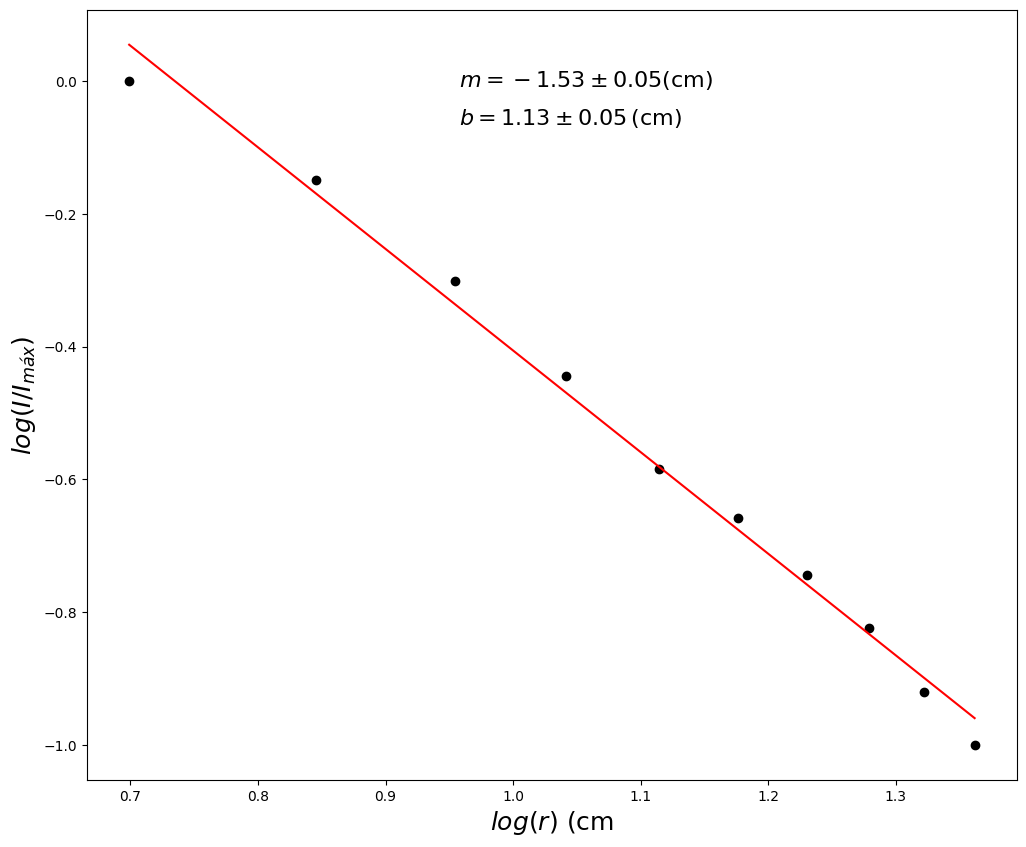

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-r' )
plt.xlabel( r"$log(r)~(\rm{{cm}}$", fontsize=18)
plt.ylabel( r"$log(I/I_{máx})$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}(\rm{{cm}})$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,\left(\rm{{cm}}\right)$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )